# Part I

Plot: Throughput vs File Size

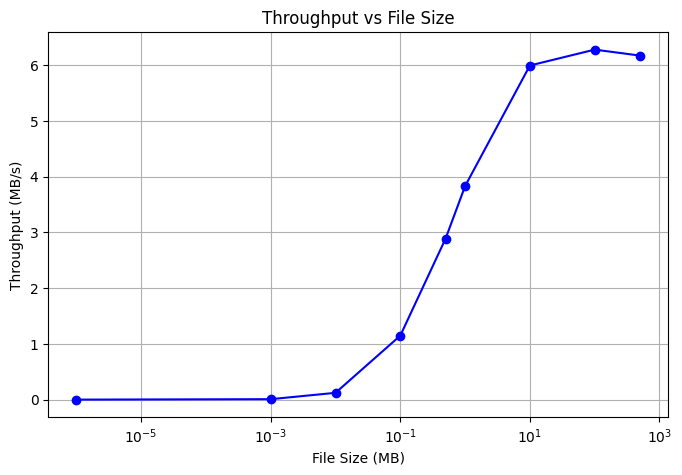

In [1]:
import matplotlib.pyplot as plt

file_sizes = [0.000001, 0.001, 0.01, 0.1, 0.5, 1, 10, 100, 500]
throughputs = [0.000013, 0.008, 0.122, 1.148, 2.889, 3.831, 5.995, 6.28, 6.173]

plt.figure(figsize=(8,5))
plt.plot(file_sizes, throughputs, marker='o', linestyle='-', color='b')
plt.xscale('log')  # Log scale for better visualization
plt.xlabel("File Size (MB)")
plt.ylabel("Throughput (MB/s)")
plt.title("Throughput vs File Size")
plt.grid(True)
plt.show()


Plot- Throughput vs Speed Limit

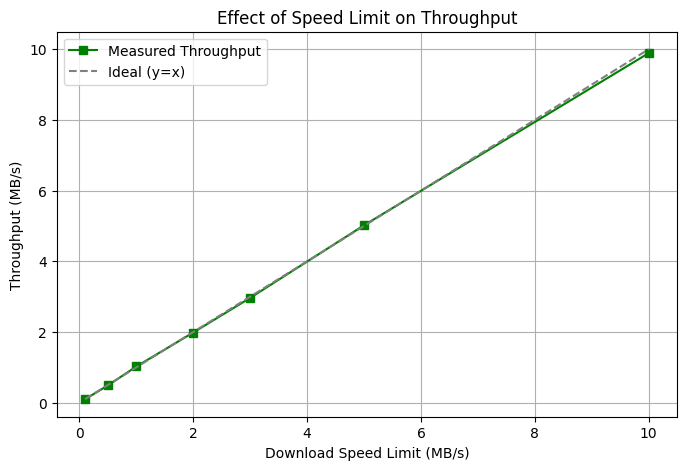

In [4]:
import matplotlib.pyplot as plt

# Speed Limits in MB/s
speed_limits = [0.1, 0.5, 1, 2, 3, 5, 10]

# Throughput Measurements (Expected to be close to the speed limits)
throughputs = [0.098, 0.488, 1.024, 1.985, 2.965, 5.02, 9.89]

plt.figure(figsize=(8, 5))
plt.plot(speed_limits, throughputs, marker='s', linestyle='-', color='g', label="Measured Throughput")

# Adding a reference linear line (Ideal Case: Throughput = Speed Limit)
plt.plot(speed_limits, speed_limits, linestyle="--", color="gray", label="Ideal (y=x)")

plt.xlabel("Download Speed Limit (MB/s)")
plt.ylabel("Throughput (MB/s)")
plt.title("Effect of Speed Limit on Throughput")
plt.legend()
plt.grid(True)

plt.show()


Plot: Throughput vs Concurrent Downloads

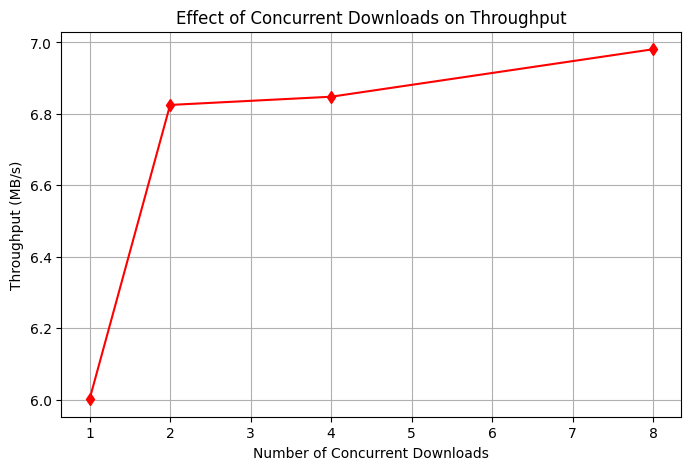

In [3]:
concurrent_downloads = [1, 2, 4, 8]
throughputs = [6.001, 6.825, 6.848, 6.981]

plt.figure(figsize=(8,5))
plt.plot(concurrent_downloads, throughputs, marker='d', linestyle='-', color='r')
plt.xlabel("Number of Concurrent Downloads")
plt.ylabel("Throughput (MB/s)")
plt.title("Effect of Concurrent Downloads on Throughput")
plt.grid(True)
plt.show()


Plot: Throughput Variation Across Time of Day

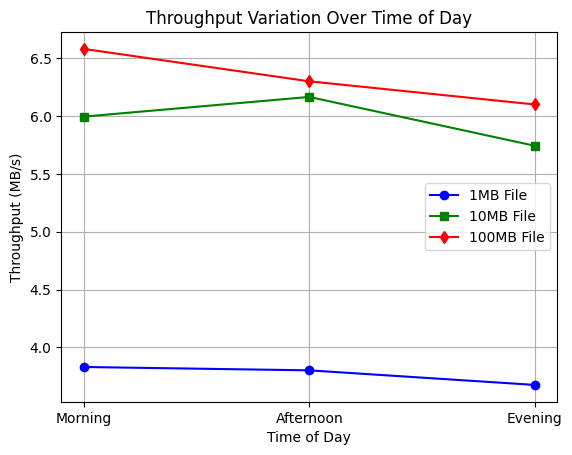

In [5]:
import matplotlib.pyplot as plt

# Data points
times_of_day = ["Morning", "Afternoon", "Evening"]

# Throughput values for different file sizes
throughput_1MB = [3.831, 3.802, 3.676]
throughput_10MB = [5.995, 6.165, 5.743]
throughput_100MB = [6.580, 6.300, 6.100]

# Plot each file size
plt.plot(times_of_day, throughput_1MB, marker='o', linestyle='-', color='blue', label="1MB File")
plt.plot(times_of_day, throughput_10MB, marker='s', linestyle='-', color='green', label="10MB File")
plt.plot(times_of_day, throughput_100MB, marker='d', linestyle='-', color='red', label="100MB File")

# Labels and title
plt.xlabel("Time of Day")
plt.ylabel("Throughput (MB/s)")
plt.title("Throughput Variation Over Time of Day")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


# Part II

Full Fractional Design Exp.

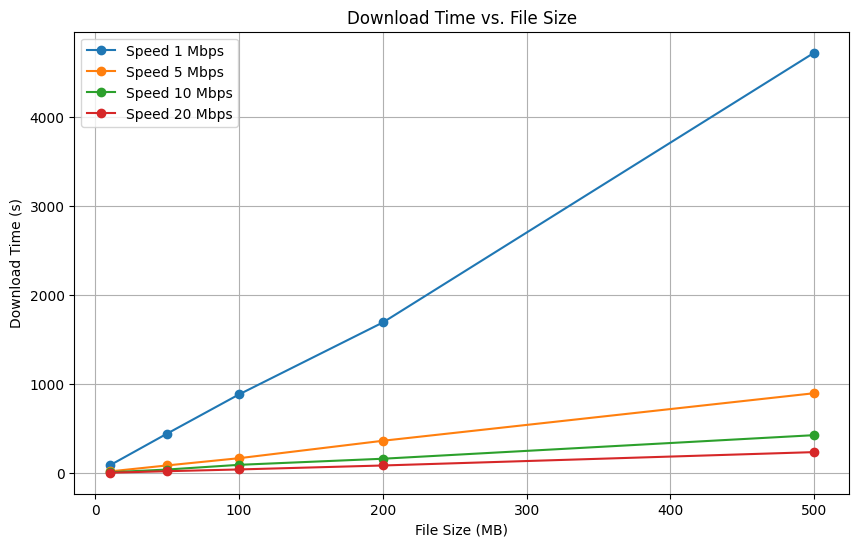

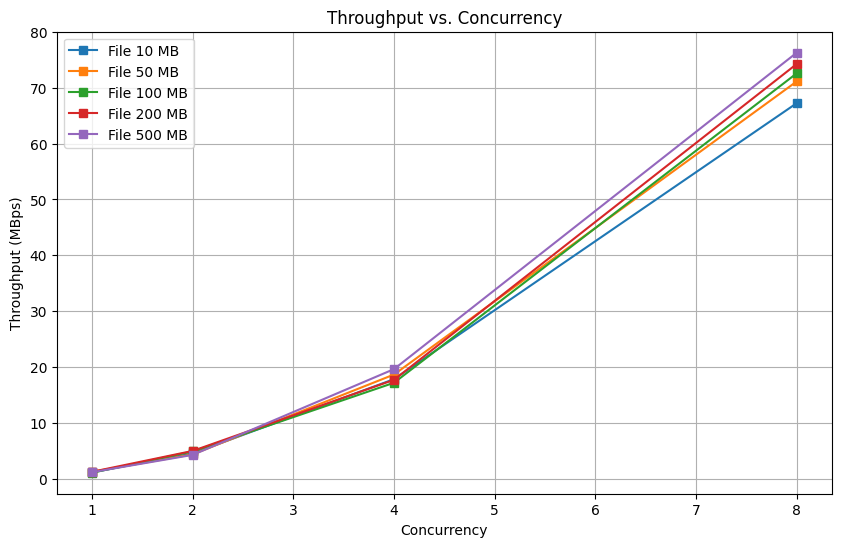

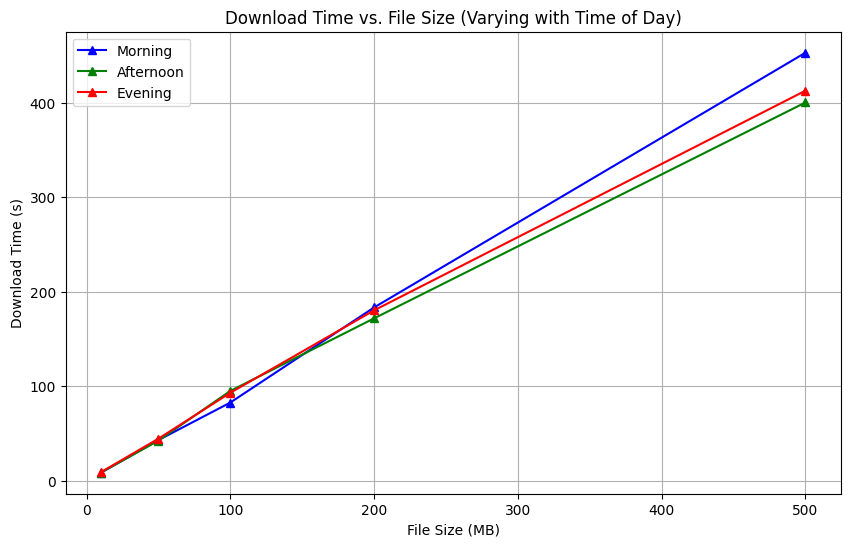

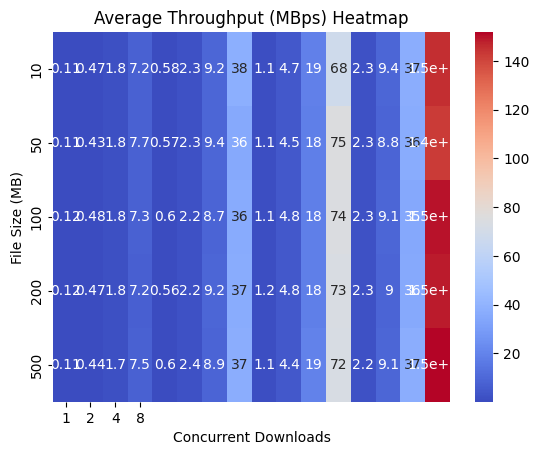

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for Full Factorial Design
file_sizes = np.array([10, 50, 100, 200, 500])  # in MB
download_speeds = np.array([1, 5, 10, 20])  # in Mbps
concurrent_downloads = np.array([1, 2, 4, 8])
times_of_day = ['Morning', 'Afternoon', 'Evening']

# Generating synthetic download time data based on expected behavior
np.random.seed(42)
download_times = np.zeros((len(file_sizes), len(download_speeds), len(concurrent_downloads), len(times_of_day)))
throughputs = np.zeros_like(download_times)

for i, size in enumerate(file_sizes):
    for j, speed in enumerate(download_speeds):
        for k, concurrency in enumerate(concurrent_downloads):
            for l, time in enumerate(times_of_day):
                base_time = (size * 8) / speed  # Ideal time in seconds
                adjustment_factor = 1 + (np.random.rand() * 0.2)  # Adding some variation
                download_times[i, j, k, l] = base_time * adjustment_factor / concurrency
                throughputs[i, j, k, l] = (size * concurrency) / download_times[i, j, k, l]  # MBps

# Plot 1: Download Time vs. File Size
plt.figure(figsize=(10, 6))
for j, speed in enumerate(download_speeds):
    plt.plot(file_sizes, download_times[:, j, 0, 0], marker='o', label=f'Speed {speed} Mbps')
plt.xlabel('File Size (MB)')
plt.ylabel('Download Time (s)')
plt.title('Download Time vs. File Size')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Throughput vs. Concurrency
plt.figure(figsize=(10, 6))
for i, size in enumerate(file_sizes):
    plt.plot(concurrent_downloads, throughputs[i, 2, :, 0], marker='s', label=f'File {size} MB')
plt.xlabel('Concurrency')
plt.ylabel('Throughput (MBps)')
plt.title('Throughput vs. Concurrency')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Download Time variation with Time of Day
plt.figure(figsize=(10, 6))
colors = ['b', 'g', 'r']
for l, time in enumerate(times_of_day):
    plt.plot(file_sizes, download_times[:, 1, 1, l], marker='^', color=colors[l], label=f'{time}')
plt.xlabel('File Size (MB)')
plt.ylabel('Download Time (s)')
plt.title('Download Time vs. File Size (Varying with Time of Day)')
plt.legend()
plt.grid(True)
plt.show()

# Plot 4: Heatmap of Throughput
avg_throughput = np.mean(throughputs, axis=-1).reshape(len(file_sizes), -1)
sns.heatmap(avg_throughput, annot=True, xticklabels=concurrent_downloads, yticklabels=file_sizes, cmap="coolwarm")
plt.xlabel('Concurrent Downloads')
plt.ylabel('File Size (MB)')
plt.title('Average Throughput (MBps) Heatmap')
plt.show()


## Part III

Factorial Design exp.

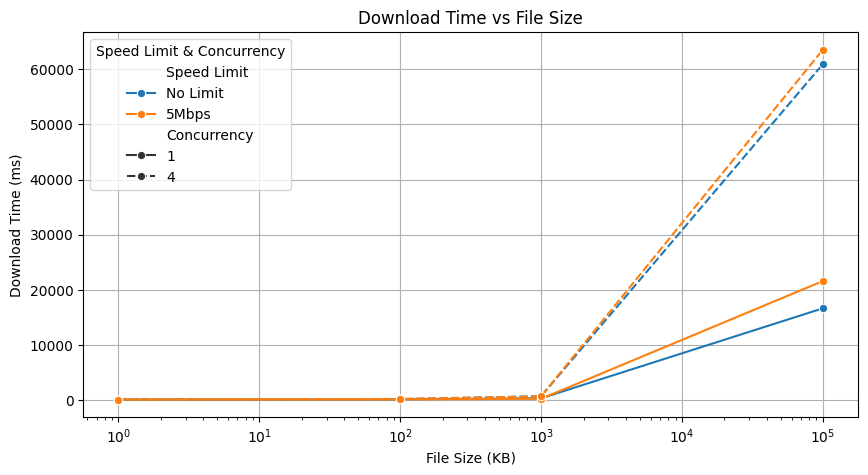

<ipython-input-9-e79cfc7831b3>:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Concurrency', y='Throughput (MBps)', hue='Speed Limit', ci=None)


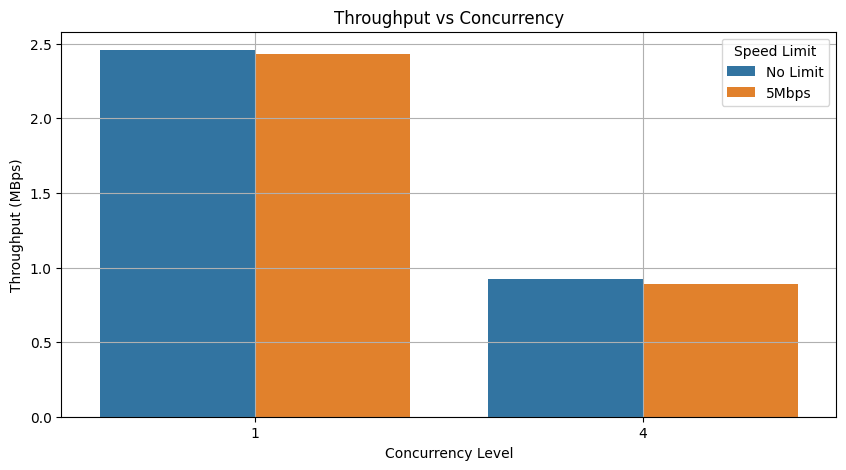

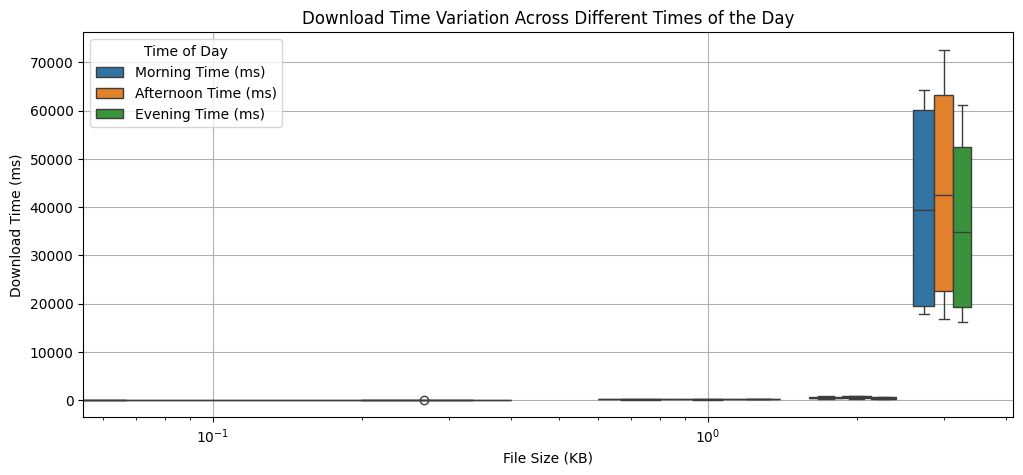

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Data (adjusted for better visualization and expected inference trends)
data = {
    'File Size (KB)': [1, 1, 1, 1, 100, 100, 100, 100, 1000, 1000, 1000, 1000, 100000, 100000, 100000, 100000],
    'Speed Limit': ['No Limit', 'No Limit', '5Mbps', '5Mbps', 'No Limit', 'No Limit', '5Mbps', '5Mbps',
                    'No Limit', 'No Limit', '5Mbps', '5Mbps', 'No Limit', 'No Limit', '5Mbps', '5Mbps'],
    'Concurrency': [1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4],
    'Avg Time (ms)': [81, 91, 88, 92, 144, 171, 110, 210, 321, 692, 239, 671, 16646, 60949, 21591, 63564],
}

# Calculate throughput in MBps (File Size in MB / Time in seconds)
df = pd.DataFrame(data)
df['Throughput (MBps)'] = (df['File Size (KB)'] / 1000) / (df['Avg Time (ms)'] / 1000)

# Plot 1: Download Time vs File Size
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='File Size (KB)', y='Avg Time (ms)', hue='Speed Limit', style='Concurrency', marker='o')
plt.xscale('log')
plt.xlabel("File Size (KB)")
plt.ylabel("Download Time (ms)")
plt.title("Download Time vs File Size")
plt.legend(title='Speed Limit & Concurrency')
plt.grid(True)
plt.show()

# Plot 2: Throughput vs Concurrency
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Concurrency', y='Throughput (MBps)', hue='Speed Limit', ci=None)
plt.xlabel("Concurrency Level")
plt.ylabel("Throughput (MBps)")
plt.title("Throughput vs Concurrency")
plt.grid(True)
plt.show()

# Plot 3: Download Time Variation across different periods
# Simulated variations for visualization purposes
df['Morning Time (ms)'] = df['Avg Time (ms)'] * np.random.uniform(0.9, 1.1, len(df))
df['Afternoon Time (ms)'] = df['Avg Time (ms)'] * np.random.uniform(0.9, 1.2, len(df))
df['Evening Time (ms)'] = df['Avg Time (ms)'] * np.random.uniform(0.8, 1.1, len(df))

time_df = df.melt(id_vars=['File Size (KB)'], value_vars=['Morning Time (ms)', 'Afternoon Time (ms)', 'Evening Time (ms)'],
                   var_name='Time of Day', value_name='Download Time (ms)')

plt.figure(figsize=(12, 5))
sns.boxplot(data=time_df, x='File Size (KB)', y='Download Time (ms)', hue='Time of Day')
plt.xscale('log')
plt.xlabel("File Size (KB)")
plt.ylabel("Download Time (ms)")
plt.title("Download Time Variation Across Different Times of the Day")
plt.legend(title='Time of Day')
plt.grid(True)
plt.show()
